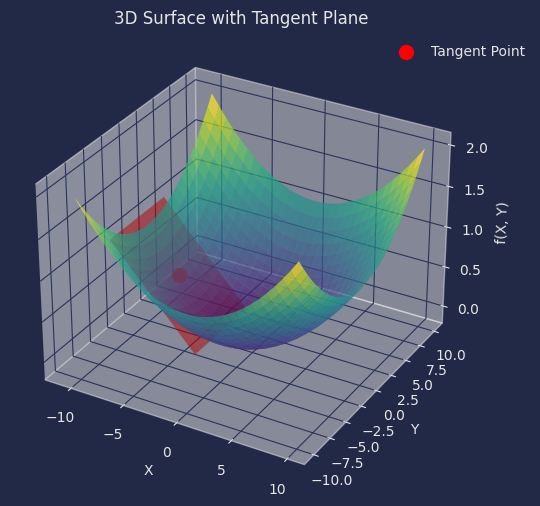

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 2변수 함수 정의
def function_2(x, y):
    return 0.01*x**2 + 0.01*y**2

# 기울기(Gradient) 계산
def numerical_gradient(f, x, y, h=1e-4):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

# 접평면 계산 함수
def tangent_plane(f, x0, y0):
    """ (x0, y0)에서의 접평면을 계산하는 함수 """
    z0 = f(x0, y0)  # 원래 함수값
    grad = numerical_gradient(f, x0, y0)  # (df/dx, df/dy)
    
    # 접평면 식: z = f(x0, y0) + df/dx * (x - x0) + df/dy * (y - y0)
    def plane(x, y):
        return z0 + grad[0] * (x - x0) + grad[1] * (y - y0)
    
    return plane

# 그리드 생성
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
Z = function_2(X, Y)

# 🎨 3D 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# 🔹 특정 점 (a, b)에서의 접평면 추가
a, b = -7, 0  # 접평면을 계산할 점
plane_func = tangent_plane(function_2, a, b)  # 접평면 함수 얻기

# 🔹 접평면을 그릴 X, Y 범위 설정
x_tangent = np.linspace(a - 4, a + 4, 10)
y_tangent = np.linspace(b - 4, b + 4, 10)
X_tan, Y_tan = np.meshgrid(x_tangent, y_tangent)
Z_tan = plane_func(X_tan, Y_tan)

# 🔹 접평면 그리기
ax.plot_surface(X_tan, Y_tan, Z_tan, color='r', alpha=0.5)  # 투명도 조절

# 🔹 점 표시
ax.scatter(a, b, function_2(a, b), color='red', s=100, label="Tangent Point")

# 축 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Surface with Tangent Plane')
ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

plt.show()